# MD simulation trajectory analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# RMSD 

In [2]:
def load_rmsd(file_name):
    time = []
    rmsd = []
    with open(file_name) as file:
        for line in file:
            if not line.startswith(('@', '#')):
                t, r = map(float, line.split())
                time.append(t)
                rmsd.append(r)
    return time, rmsd


In [3]:
# Load RMSD data
time_protein, protein_rmsd = load_rmsd('protein_rmsd.xvg')
time_complex9, complex_rmsd9 = load_rmsd('complex_rmsd9.xvg')
time_complex8, complex_rmsd8 = load_rmsd('complex_rmsd8.xvg')

In [4]:
protein_average_rmsd = sum(protein_rmsd)/len(protein_rmsd)
complex_average_rmsd9 = sum(complex_rmsd9)/len(complex_rmsd9)
complex_average_rmsd8 = sum(complex_rmsd8)/len(complex_rmsd8)

In [5]:
protein_average_rmsd

0.2280869980019982

In [6]:
complex_average_rmsd9

0.182006336163836

In [7]:
complex_average_rmsd8

0.27225580619380624

## RMSD 

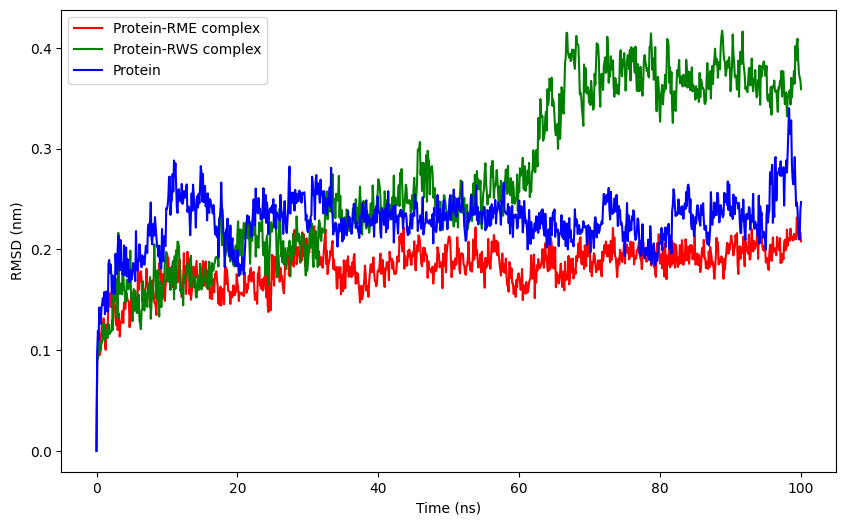

In [9]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_complex9, complex_rmsd9, label='Protein-RME complex', color='red')
plt.plot(time_complex9, complex_rmsd8, label='Protein-RWS complex', color='green')
plt.plot(time_protein, protein_rmsd, label='Protein', color='blue')


# plt.title('RMSD Comparison: Protein vs Protein-Ligand Complex')
plt.xlabel('Time (ns)')
plt.ylabel('RMSD (nm)')
plt.legend()
plt.savefig('rmsd_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


## RMSF

In [10]:
# Function to read .xvg files
def read_xvg(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if not line.startswith(('#', '@')):  # Ignore header lines
                columns = line.split()
                data.append([float(columns[0]), float(columns[1])])
    return np.array(data)

In [11]:
# Load data from the RMSF .xvg files
protein_rmsf = read_xvg('protein_rmsf.xvg')
complex_rmsf9 = read_xvg('complex_rmsf9.xvg')
complex_rmsf8 = read_xvg('complex_rmsf8.xvg')

In [12]:
# Extract residue indices and RMSF values
protein_residues = protein_rmsf[:, 0]
protein_rmsf_values = protein_rmsf[:, 1]
complex_residues9 = complex_rmsf9[:, 0]
complex_rmsf_values9 = complex_rmsf9[:, 1]
complex_residues8 = complex_rmsf8[:, 0]
complex_rmsf_values8 = complex_rmsf8[:, 1]

In [13]:
# Calculate average RMSF values
protein_avg_rmsf = np.mean(protein_rmsf_values)
complex_avg_rmsf9 = np.mean(complex_rmsf_values9)
complex_avg_rmsf8 = np.mean(complex_rmsf_values8)

In [14]:
protein_avg_rmsf

0.09499692585895117

In [15]:
complex_avg_rmsf9

0.1033141048824593

In [16]:
complex_avg_rmsf8

0.13164430379746833

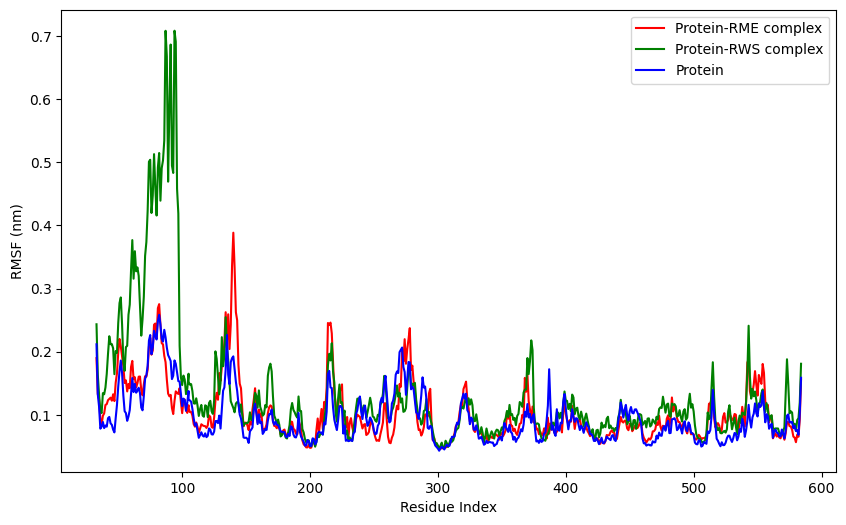

In [17]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(complex_residues9, complex_rmsf_values9, label='Protein-RME complex', color='red')
plt.plot(complex_residues8, complex_rmsf_values8, label='Protein-RWS complex', color='green')
plt.plot(protein_residues, protein_rmsf_values, label='Protein', color='blue')


# plt.title('RMSF')
plt.xlabel('Residue Index')
plt.ylabel('RMSF (nm)')
plt.legend()
plt.savefig('rmsf_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## HYDROGEN BOND

In [19]:
def load_xvg(filename):
    time = []
    hbonds = []
    
    with open(filename, 'r') as file:
        for line in file:
            if not line.startswith(('@', '#')):
                cols = line.split()
                time.append(float(cols[0]))  # Time
                hbonds.append(float(cols[1]))  # Number of hydrogen bonds
    
    return time, hbonds

In [20]:
# Load the data
time, hbonds9 = load_xvg('hb9.xvg')
time, hbonds8 = load_xvg('hb8.xvg')

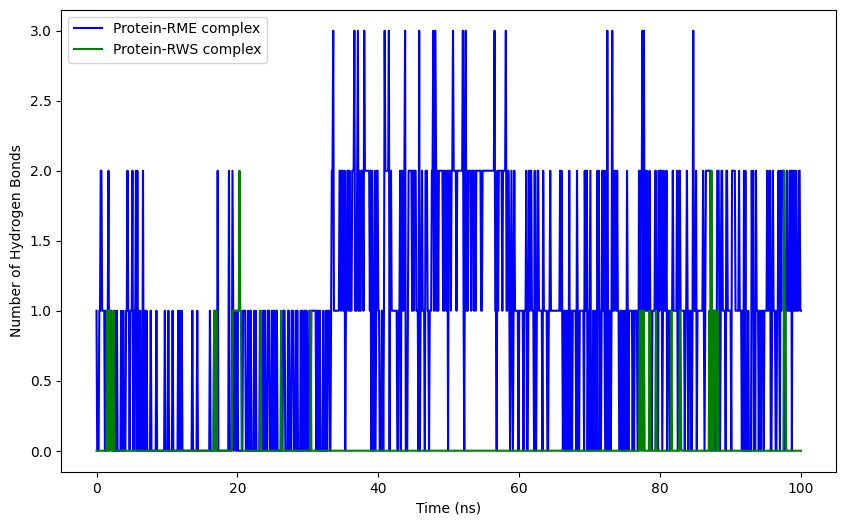

In [34]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time, hbonds9, label='Protein-RME complex', color='blue', linestyle='-', marker=None)
plt.plot(time, hbonds8, label='Protein-RWS complex', color='green', linestyle='-', marker=None)
plt.xlabel('Time (ns)')
plt.ylabel('Number of Hydrogen Bonds')
# plt.title('Hydrogen Bonds Over Time')
plt.legend()
plt.grid(False)
plt.savefig('h_bond.png', dpi=300, bbox_inches='tight')
plt.show()

## SASA

In [22]:
# Function to load .xvg data, skipping header lines
def load_xvg(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f:
            if not line.startswith(('@', '#')):
                data.append([float(x) for x in line.split()])
    return np.array(data)

In [23]:
protein_data = load_xvg('protein_sasa.xvg')
complex_data9 = load_xvg('complex_sasa9.xvg')
complex_data8 = load_xvg('complex_sasa8.xvg')

In [24]:
protein_time = protein_data[:, 0]
protein_sasa = protein_data[:, 1]
complex_time9 = complex_data9[:, 0]
complex_sasa9 = complex_data9[:, 1]
complex_time8 = complex_data8[:, 0]
complex_sasa8 = complex_data8[:, 1]

In [25]:
protein_average_sasa = sum(protein_sasa)/len(protein_sasa)
complex_average_sasa9 = sum(complex_sasa9)/len(complex_sasa9)
complex_average_sasa8 = sum(complex_sasa8)/len(complex_sasa8)

In [26]:
protein_average_sasa

329.44009990010005

In [27]:
complex_average_sasa9

331.42019680319675

In [28]:
complex_average_sasa8

328.79868831168864

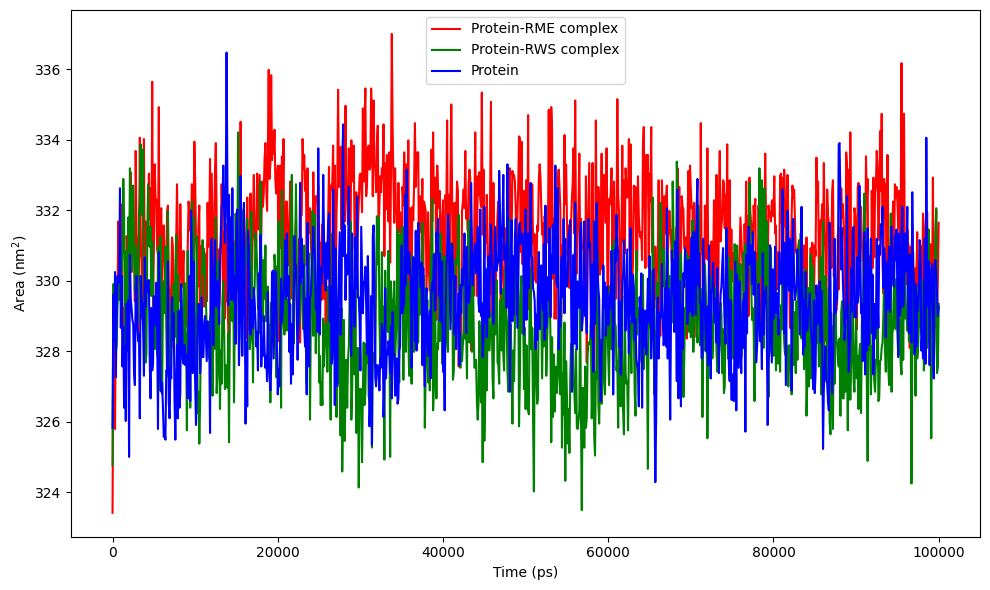

In [37]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(complex_time9, complex_sasa9, label='Protein-RME complex', color='red')
plt.plot(complex_time8, complex_sasa8, label='Protein-RWS complex', color='green')
plt.plot(protein_time, protein_sasa, label='Protein', color='blue')

# plt.title('SASA')
plt.xlabel('Time (ps)')
plt.ylabel(r'Area (nm$^2$)')
plt.legend()
plt.tight_layout() 
plt.savefig('sasa_comparison.png', dpi=300, bbox_inches='')
plt.show()

# Radius of gyration

In [38]:
# Function to read .xvg files and extract time and Rg data
def read_xvg(file_path):
    time = []
    rg = []
    with open(file_path, 'r') as file:
        for line in file:
            if not line.startswith(('#', '@')):  # Ignore header lines starting with # or @
                columns = line.split()
                time.append(float(columns[0]))
                rg.append(float(columns[1]))
    return np.array(time), np.array(rg)

In [39]:
# Load data from the .xvg files
protein_time, protein_rg = read_xvg('protein_gyrate.xvg')
complex_time9, complex_rg9 = read_xvg('complex_gyrate9.xvg')
complex_time9, complex_rg8 = read_xvg('complex_gyrate8.xvg')

In [40]:
protein_average_gyrate = sum(protein_rg)/len(protein_rg)
complex_average_gyrate9 = sum(complex_rg9)/len(complex_rg9)
complex_average_gyrate8 = sum(complex_rg8)/len(complex_rg8)

In [41]:
protein_average_gyrate

2.4336721678321633

In [42]:
complex_average_gyrate9

2.4562055744255757

In [43]:
complex_average_gyrate8

2.438074735264734

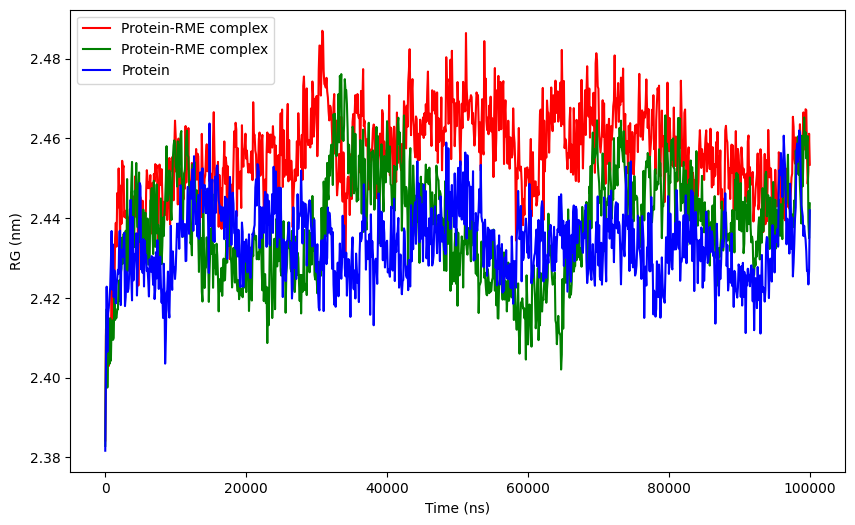

In [44]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(complex_time9, complex_rg9, label='Protein-RME complex', color='red')
plt.plot(complex_time8, complex_rg8, label='Protein-RME complex', color='green')
plt.plot(protein_time, protein_rg, label='Protein', color='blue')


# plt.title('RG')
plt.xlabel('Time (ns)')
plt.ylabel('RG (nm)')
plt.legend()
plt.savefig('gyration_comparison.png', dpi=300, bbox_inches='tight')
plt.show()